# Machine Learning - Random Forest (Floresta Aleatória)

#### Importação das bibliotecas necessárias

In [1]:
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Carregando a base de dados.

In [2]:
df_edu = pd.read_csv('xAPI-Edu-Data.csv')

In [3]:
df_edu.head(20)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M


In [4]:
df_edu.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

#### Verificando as distribuições de classes.

In [9]:
df_edu['Class'].value_counts()

M    211
H    142
L    127
Name: Class, dtype: int64

#### Verificando os registros nulos

In [6]:
df_edu.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

#### Codificando os atributos numéricos.

In [7]:
# O presente algoritmo tambem suporta trabalhar com dados categóricos, 
# porém na bliblioteca skitlearn ele ainda não suporta categoricos para o random forest, por isso deve ser feita a codificação.


Features = df_edu
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums: #Pra cada coluna irá roda o Cat_Colums.
    label = LabelEncoder()
    Features[col] = label.fit_transform(Features[col])

In [8]:
Features.head(10)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1,2
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1,2
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0,1
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0,1
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0,2
5,0,4,4,2,1,0,7,0,0,42,30,13,70,1,0,0,2
6,1,4,4,1,4,0,8,0,0,35,12,0,17,0,0,0,1
7,1,4,4,1,4,0,8,0,0,50,10,15,22,1,1,1,2
8,0,4,4,1,4,0,8,0,0,12,21,16,50,1,1,1,2
9,0,4,4,1,4,1,7,0,0,70,80,25,70,1,1,1,2


#### Dividindo os dados em treino e teste

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df_edu.drop('Class',axis=1),df_edu['Class'],test_size=0.3,random_state=0)

#### Verificando a forma dos dados

In [21]:
X_train.shape,X_test.shape

((336, 16), (144, 16))

In [22]:
y_train.shape,y_test.shape

((336,), (144,))

#### Instânciando o objeto classificador

In [11]:
random_clf = RandomForestClassifier()

#### Parâmetros do  objeto RandomForestClassifier
* <span style="color:red">n_estimators: número de árvores que serão criadas na floresta.</span>
* <span style="color:red"> bootstrap: se será considerado o bootstrap dataset durante a criação das árvores.</span>
* <span style="color:red"> max_features: número total de features que as árvores serão criadas.# o numero total de fetuares, as variáveis</span>
* criterion: medida de qualidade da divisão.
* splitter: estratégia utilizada para dividir o nó de decisão.
* max_depth: profundidade máxima da árvore.
* min_samples_split: número de amostras mínimas para considerar um nó para divisão.
* min_samples_leaf: número de amostras mínimas no nível folha.

#### Treinando o modelo Random Forest

In [12]:
random_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Predizendo as classes a partir do modelo treinado utilizando o conjunto de teste

In [13]:
resultado = random_clf.predict(X_test)

In [26]:
resultado

array([2, 1, 1, 2, 2, 2, 0, 1, 1, 1, 0, 2, 2, 1, 2, 0, 0, 1, 1, 0, 1, 0,
       2, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 2, 2, 1, 2, 0,
       2, 2, 0, 2, 1, 2, 2, 2, 2, 1, 0, 2, 1, 1, 2, 2, 2, 2, 2, 0, 0, 2,
       1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 2, 0, 1, 1, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 2, 1, 2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 0, 1, 2,
       1, 2, 1, 1, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 1,
       0, 2, 2, 0, 2, 2, 1, 0, 2, 2, 2, 0])

#### Métricas de Validação

In [14]:
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75        39
           1       0.80      0.94      0.86        34
           2       0.82      0.76      0.79        71

    accuracy                           0.80       144
   macro avg       0.79      0.82      0.80       144
weighted avg       0.80      0.80      0.80       144



#### Verificando as features mais importantes para o modelo treinado

In [15]:
random_clf.feature_importances_

array([0.02342469, 0.036067  , 0.03435145, 0.01715761, 0.03229074,
       0.02089713, 0.04244073, 0.01025924, 0.04430841, 0.15781655,
       0.16839556, 0.12905687, 0.09032408, 0.03666106, 0.02463665,
       0.13191224])

In [16]:
X_train.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays'],
      dtype='object')

In [17]:
feature_imp = pd.Series(random_clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)

In [21]:
feature_imp

VisITedResources            0.168396
raisedhands                 0.157817
StudentAbsenceDays          0.131912
AnnouncementsView           0.129057
Discussion                  0.090324
Relation                    0.044308
Topic                       0.042441
ParentAnsweringSurvey       0.036661
NationalITy                 0.036067
PlaceofBirth                0.034351
GradeID                     0.032291
ParentschoolSatisfaction    0.024637
gender                      0.023425
SectionID                   0.020897
StageID                     0.017158
Semester                    0.010259
dtype: float64

#### Features mais importantes de forma gráfica

In [19]:
def visualiza_features_importantes(features_lista):
    %matplotlib inline

    plt.figure(figsize=(16,8))
    sns.barplot(x=features_lista, y=features_lista.index)

    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.show()

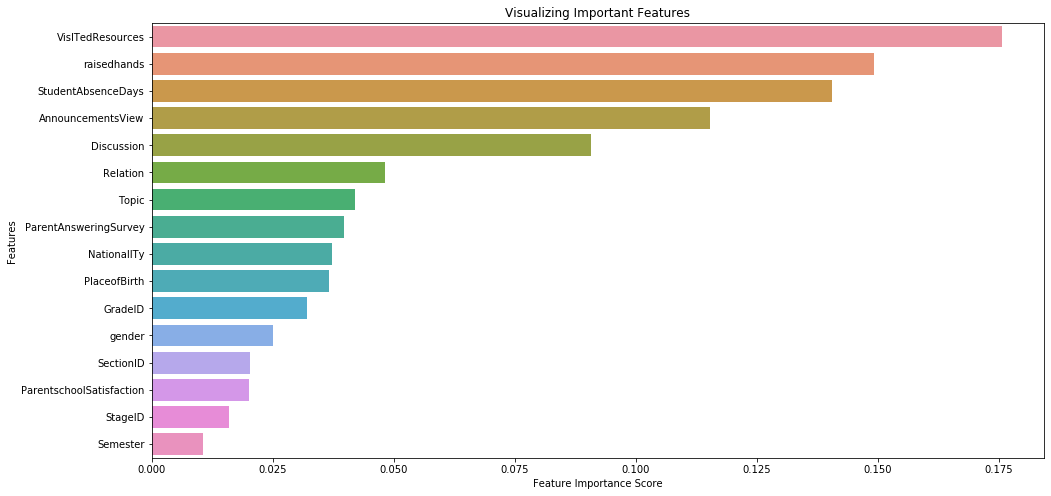

In [38]:
visualiza_features_importantes(feature_imp)

#### Selecionando apenas as features com importancia acima de um determinado score.

In [22]:
feature_imp.iteritems()

In [23]:
features_selecionadas = []
for feature,importancia in feature_imp.iteritems():
    if importancia > 0.03:
        print("{}:\t{}".format(feature, importancia))
        features_selecionadas.append(feature)

VisITedResources:	0.16839555748941507
raisedhands:	0.15781655010311973
StudentAbsenceDays:	0.13191224084272796
AnnouncementsView:	0.12905687277711878
Discussion:	0.09032408178741021
Relation:	0.044308414284735614
Topic:	0.04244072998599626
ParentAnsweringSurvey:	0.036661057079043824
NationalITy:	0.03606699639399955
PlaceofBirth:	0.03435145483675115
GradeID:	0.032290735197368636


#### Separando os dados em treino e teste utilizando apenas as features selecionadas

In [24]:
df_edu[features_selecionadas]

,VisITedResources,raisedhands,StudentAbsenceDays,AnnouncementsView,Discussion,Relation,Topic,ParentAnsweringSurvey,NationalITy,PlaceofBirth,GradeID
0,16,15,1,2,20,0,7,1,4,4,1
1,20,20,1,3,25,0,7,1,4,4,1
2,7,10,0,0,30,0,7,0,4,4,1
3,25,30,0,5,35,0,7,0,4,4,1
4,50,40,0,12,50,0,7,0,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...
475,4,5,0,5,8,0,2,0,3,3,5
476,77,50,1,14,28,0,5,0,3,3,5
477,74,55,1,25,29,0,5,0,3,3,5
478,17,30,0,14,57,0,6,0,3,3,5


In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    df_edu[features_selecionadas],
    df_edu['Class'],
    test_size=0.3,
    random_state=0
)

#### Verificando a nova forma dos dados

In [42]:
X_train.shape,X_test.shape

((336, 11), (144, 11))

In [43]:
y_train.shape,y_test.shape

((336,), (144,))

#### Instânciando o objeto classificador

In [26]:
random_clf = RandomForestClassifier(random_state=0)

#### Treinando novamente o modelo Random Forest

In [27]:
random_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

#### Executando o algoritmo de arvore de decisão com o conjunto de teste

In [28]:
resultado = random_clf.predict(X_test)
resultado

array([2, 1, 1, 2, 2, 2, 0, 1, 1, 1, 0, 2, 0, 1, 2, 0, 0, 1, 1, 0, 1, 0,
       2, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2, 1, 0, 0,
       2, 2, 0, 2, 1, 2, 2, 2, 0, 1, 0, 2, 1, 1, 2, 2, 2, 2, 0, 0, 0, 2,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 2, 2, 1, 1, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 0, 1, 2, 2, 1, 2, 0, 1, 0, 1, 2,
       1, 1, 1, 1, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1,
       0, 1, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0])

#### Métricas de Validação

In [29]:
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           0       0.71      0.74      0.72        39
           1       0.80      0.97      0.88        34
           2       0.82      0.72      0.77        71

    accuracy                           0.78       144
   macro avg       0.78      0.81      0.79       144
weighted avg       0.79      0.78      0.78       144



## Explorando as árvores da Floresta gerada

In [31]:
print("Número de árvores da floresta: {}".format(len(random_clf.estimators_)))#cada estimator é uma arvore na floresta.
print("Árvores floresta gerada:")
for tree in random_clf.estimators_:
    print("\nNumero de nós: {}".format(tree.tree_.node_count))
    print("Profundidade da árvore: {}".format(tree.tree_.max_depth))
    print("Features importantes: {}".format(tree.feature_importances_))
    print("\nObjeto: {}".format(tree))


Número de árvores da floresta: 100
Árvores floresta gerada:

Numero de nós: 129
Profundidade da árvore: 10
Features importantes: [0.11895918 0.12259911 0.24943917 0.16860482 0.03363919 0.11104068
 0.04108677 0.02272275 0.06214498 0.04186641 0.02789694]

Objeto: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=209652396, splitter='best')

Numero de nós: 145
Profundidade da árvore: 13
Features importantes: [0.18743742 0.13851179 0.2063414  0.11401743 0.07692714 0.04593486
 0.0450154  0.10337816 0.03712027 0.00555616 0.03975997]

Objeto: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_

 0.04649889 0.09624324 0.04388062 0.02388819 0.05102062]

Objeto: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=553734235, splitter='best')

Numero de nós: 137
Profundidade da árvore: 11
Features importantes: [0.20835069 0.24109792 0.2212863  0.13469978 0.02657232 0.02623449
 0.0249856  0.00461983 0.05226028 0.01739671 0.04249609]

Objeto: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
   

#### Selecionando uma árvore da floresta

In [34]:
tree0 = random_clf.estimators_[0]


#### Visualizando de forma gráfica

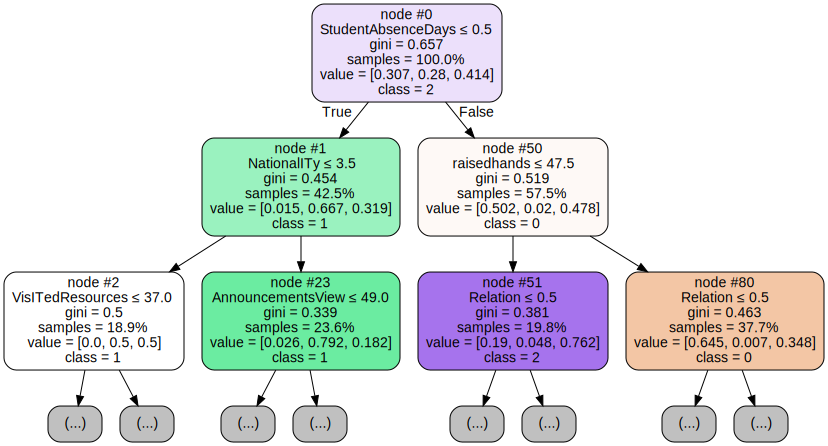

In [37]:
from sklearn.tree import export_graphviz
import graphviz 

dot_data = export_graphviz(
         tree0,
         max_depth=2, #limita paenas a exibição.
         out_file=None,
         feature_names=X_train.columns,
         class_names=['0','1','2'], 
         filled=True, rounded=True,
         proportion=True,
         node_ids=True,
         rotate=False,
         label='all',
         special_characters=True
        )  
graph = graphviz.Source(dot_data)  
graph

#### Selecionando outra árvore da floresta

In [38]:
tree1 = random_clf.estimators_[1]

#### Visualizando de forma gráfica

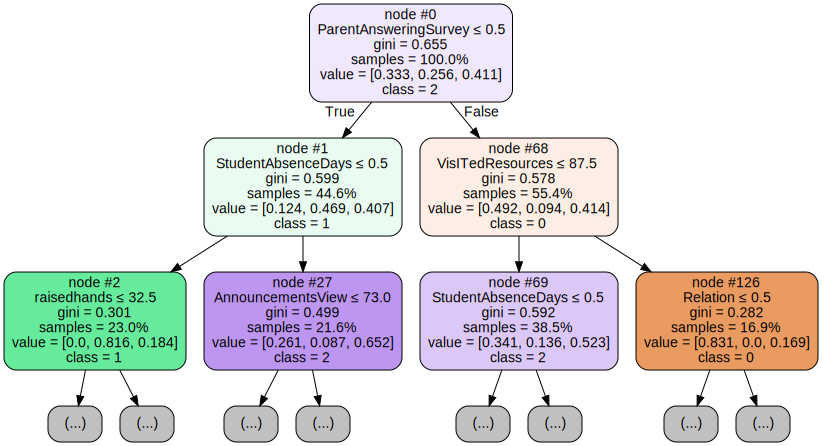

In [39]:
dot_data = export_graphviz(
         tree1,
         max_depth=2,
         out_file=None,
         feature_names=X_train.columns,
         class_names=['0','1','2'], 
         filled=True, rounded=True,
         proportion=True,
         node_ids=True,
         rotate=False,
         label='all',
         special_characters=True
        )  
graph = graphviz.Source(dot_data)  
graph